In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML practical/Processed_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,0,3,0.000,72.0,72.000000,26.0,10.0,6,10.0,16,...,0.011294,-0.023450,0.009454,-0.007929,0.000032,-0.007039,-0.011485,0.015448,-0.012006,-0.003866
1,1,4,1.002,91.8,54.472104,48.0,10.0,22,18.4,6,...,0.039491,0.021280,-0.005106,-0.015760,0.016425,0.039872,-0.047719,-0.000016,-0.013681,-0.010934
2,2,1,0.000,91.0,91.000000,38.0,10.0,20,7.0,16,...,0.012038,0.099881,0.019001,0.063796,0.002496,0.006196,0.051213,-0.014346,-0.050256,-0.007663
3,3,4,1.500,77.0,77.000000,40.0,10.0,10,12.0,91,...,0.008458,-0.063279,-0.003959,-0.030436,-0.020446,-0.017096,-0.009632,0.055119,0.063940,0.017744
4,4,4,0.180,73.0,54.472104,26.0,10.0,10,15.0,91,...,-0.047187,0.015230,0.064401,0.005247,-0.016908,-0.042391,0.024430,-0.047003,0.015520,0.032127


In [ ]:
data=data.drop(columns=['Unnamed: 0'])

In [ ]:
data.shape

(256574, 127)

In [ ]:
data.size

32584898

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
for i in range(1,21):
  column_data = data.iloc[:, i]
  print(f"Column: {data.columns[i]}")
  print(f"Skewness: {skew(column_data)}")
  print(f"Kurtosis: {kurtosis(column_data)}")

Column: Distance(mi)
Skewness: 13.02198143700167
Kurtosis: 333.7598667520443
Column: Temperature(F)
Skewness: -0.5765806712624738
Kurtosis: 0.06346582042745119
Column: Wind_Chill(F)
Skewness: -0.6873041749408466
Kurtosis: 0.9760584458695782
Column: Humidity(%)
Skewness: -0.5839638472414151
Kurtosis: -0.545277926665936
Column: Visibility(mi)
Skewness: 0.6360773699965152
Kurtosis: 28.279038482692016
Column: Wind_Direction
Skewness: 0.011158555119445607
Kurtosis: -1.2507558724801675
Column: Wind_Speed(mph)
Skewness: 1.4956276015059444
Kurtosis: 13.351909966749346
Column: Weather_Condition
Skewness: 0.34821728631932913
Kurtosis: -1.4506320766750496
Column: Crossing
Skewness: 2.2826708525226675
Kurtosis: 3.210586220956568
Column: Give_Way
Skewness: 13.46081506239057
Kurtosis: 179.1935421438809
Column: Junction
Skewness: 3.1058692125824767
Kurtosis: 7.646423565667693
Column: Railway
Skewness: 10.02748776593546
Kurtosis: 98.55051089598538
Column: Stop
Skewness: 6.014971311083029
Kurtosis: 34.

In [ ]:
X=data.drop(columns=['Severity'])
y=data['Severity']

In [ ]:
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Gaussian Naive Bayes (with StandardScaler)

 Trains the Gaussian Naive Bayes pipeline using the preprocessed training features (`X_train`) and their corresponding target labels (`y_train`).

In [ ]:
gaussian=Pipeline([
    ('scaler',StandardScaler()),
    ('gnb',GaussianNB(var_smoothing=1e-8))
])


In [ ]:
gaussian.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gnb', GaussianNB(var_smoothing=1e-08))])

In [ ]:
gnb_pred=gaussian.predict(X_test)
train_gnb_pred=gaussian.predict(X_train)

In [ ]:
print("Accuracy Score of Testing:",accuracy_score(y_test,gnb_pred)*100)
print("Accuracy Score of Training:",accuracy_score(y_train,train_gnb_pred)*100)

Accuracy Score of Testing: 76.49420247490987
Accuracy Score of Training: 76.45559999805124


In [ ]:
gnb_report=classification_report(y_test,gnb_pred)
print(gnb_report)

              precision    recall  f1-score   support

           1       0.72      0.79      0.75     12317
           2       0.79      0.64      0.71     13008
           3       0.70      0.80      0.75     13105
           4       0.88      0.83      0.85     12885

    accuracy                           0.76     51315
   macro avg       0.77      0.77      0.76     51315
weighted avg       0.77      0.76      0.76     51315



In [ ]:
gnb_pred_prob=gaussian.predict_proba(X_test)
gnb_roc=roc_auc_score(y_test,gnb_pred_prob,multi_class='ovr',average='weighted')
print("ROC AUC Score:",gnb_roc)

ROC AUC Score: 0.9156345775411427


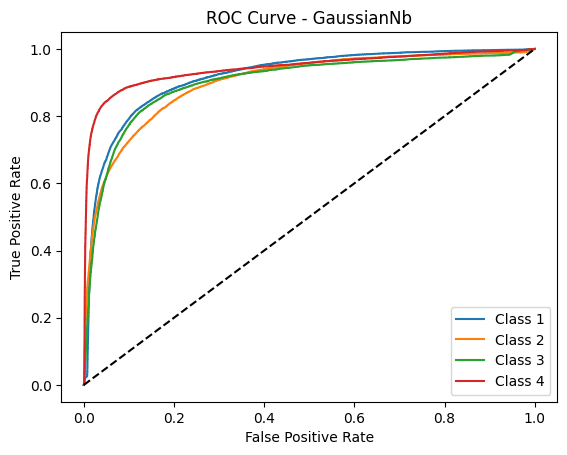

In [ ]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
for i in range(len(classes)):
    fpr,tpr,_ = roc_curve(y_test_bin[:,i],gnb_pred_prob[:,i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNb")
plt.legend()
plt.show()

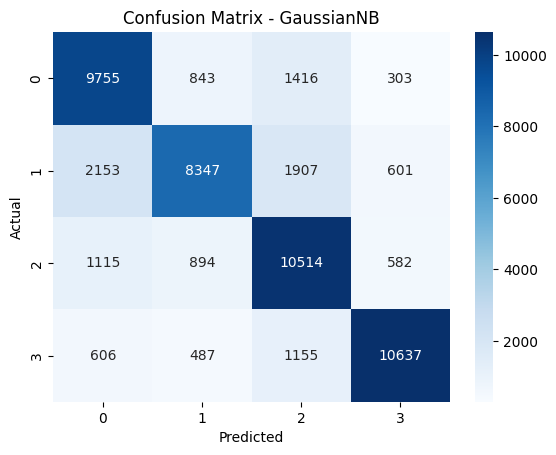

In [ ]:
gnb_cm=confusion_matrix(y_test,gnb_pred)
sns.heatmap(gnb_cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Multinomial Naive Bayes


In [ ]:
from sklearn.preprocessing import MinMaxScaler

constructs a `Pipeline` for the Multinomial Naive Bayes model. It first applies `MinMaxScaler` to scale the data, followed by `MultinomialNB`

In [ ]:
mnb_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),
    ('mnb', MultinomialNB(alpha=2.0, fit_prior=True))
])

In [ ]:
mnb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('mnb', MultinomialNB(alpha=2.0))])

In [ ]:
mnb_pred=mnb_pipeline.predict(X_test)
train_mnb_pred=mnb_pipeline.predict(X_train)

In [ ]:
print("Accuracy Score of Testing:",accuracy_score(y_test,mnb_pred)*100)
print("Accuracy Score of Training:",accuracy_score(y_train,train_mnb_pred)*100)

Accuracy Score of Testing: 48.44587352625938
Accuracy Score of Training: 48.560599048031996


In [ ]:
mnb_report=classification_report(y_test,mnb_pred)
print(mnb_report)

              precision    recall  f1-score   support

           1       0.62      0.65      0.64     12317
           2       0.74      0.21      0.33     13008
           3       0.40      0.70      0.51     13105
           4       0.41      0.38      0.40     12885

    accuracy                           0.48     51315
   macro avg       0.54      0.49      0.47     51315
weighted avg       0.54      0.48      0.47     51315



In [ ]:
mnb_pred_prob=mnb_pipeline.predict_proba(X_test)
mnb_roc=roc_auc_score(y_test,mnb_pred_prob,multi_class='ovr',average='weighted')
print("ROC AUC Score:",mnb_roc)

ROC AUC Score: 0.7813399344346543


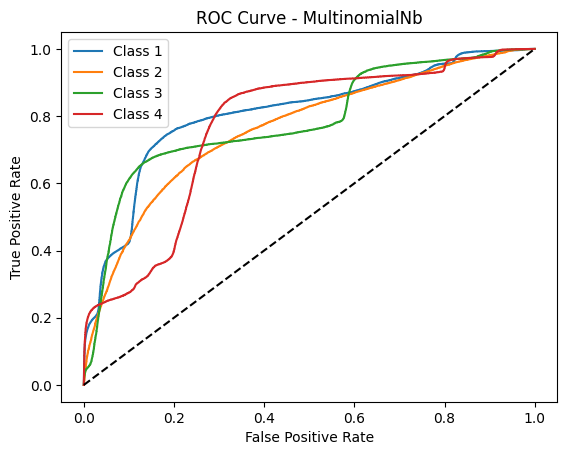

In [ ]:
for i in range(len(classes)):
    fpr,tpr,_ = roc_curve(y_test_bin[:,i],mnb_pred_prob[:,i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MultinomialNb")
plt.legend()
plt.show()

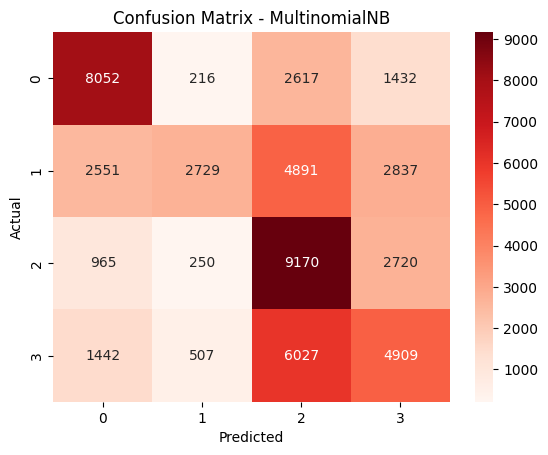

In [ ]:
mnb_cm=confusion_matrix(y_test,mnb_pred)
sns.heatmap(mnb_cm,annot=True,fmt='d',cmap='Reds')
plt.title("Confusion Matrix - MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Bernoulli Naive Bayes

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
binarizer = Binarizer(threshold=0.0)
X_train_bin = pd.DataFrame(binarizer.fit_transform(X_train),columns=X_train.columns)
X_test_bin = pd.DataFrame(binarizer.transform(X_test),columns=X_test.columns)

In [ ]:
bnb=BernoulliNB(alpha=1.0)

In [ ]:
bnb.fit(X_train_bin,y_train)

BernoulliNB()

In [ ]:
bnb_pred=bnb.predict(X_test_bin)
train_bnb_pred=bnb.predict(X_train_bin)

In [ ]:
print("Accuracy Score of test data of Bernouli NB :",accuracy_score(y_test,bnb_pred)*100)
print("Accuracy Score of train data of Bernouli NB :",accuracy_score(y_train,train_bnb_pred)*100)

Accuracy Score of test data of Bernouli NB : 76.95410698626132
Accuracy Score of train data of Bernouli NB : 76.71624630345076


In [ ]:
bnb_report=classification_report(y_test,bnb_pred)
print(bnb_report)

              precision    recall  f1-score   support

           1       0.78      0.80      0.79     12317
           2       0.73      0.64      0.68     13008
           3       0.74      0.75      0.75     13105
           4       0.82      0.89      0.85     12885

    accuracy                           0.77     51315
   macro avg       0.77      0.77      0.77     51315
weighted avg       0.77      0.77      0.77     51315



In [ ]:
bnb_pred_prob=bnb.predict_proba(X_test)
bnb_roc=roc_auc_score(y_test,bnb_pred_prob,multi_class='ovr',average='weighted')
print("ROC AUC Score:",bnb_roc)

ROC AUC Score: 0.9224459254385684


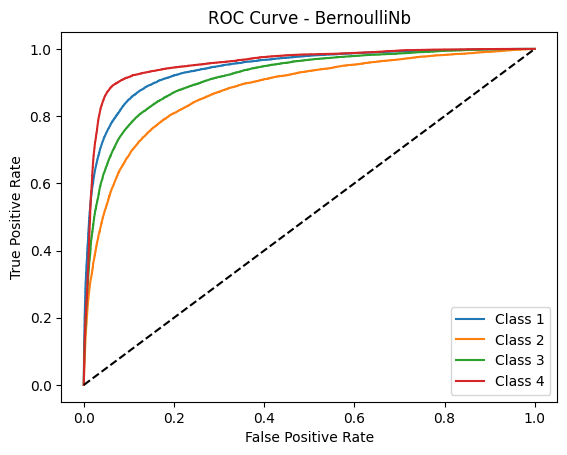

In [ ]:
for i in range(len(classes)):
  fpr,tpr,_ = roc_curve(y_test_bin[:,i],bnb_pred_prob[:,i])
  plt.plot(fpr, tpr, label=f"Class {classes[i]}")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - BernoulliNb")
plt.legend()
plt.show()


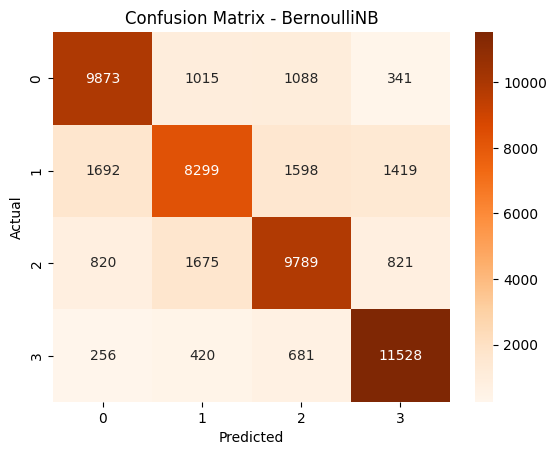

In [ ]:
bnb_cm=confusion_matrix(y_test,bnb_pred)
sns.heatmap(bnb_cm,annot=True,fmt='d',cmap='Oranges')
plt.title("Confusion Matrix - BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()